In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Load California Housing Dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [3]:
# Task 1 : Simple Linear Regression
X_simple = X[['AveRooms']]
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train, y_train)
y_pred = model_simple.predict(X_test)


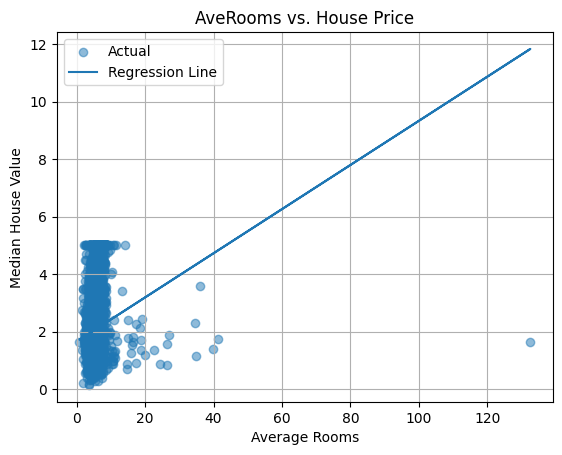

In [4]:
plt.scatter(X_test, y_test, alpha=0.5, label="Actual")
plt.plot(X_test, y_pred, label="Regression Line")
plt.xlabel("Average Rooms")
plt.ylabel("Median House Value")
plt.title("AveRooms vs. House Price")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Task 2 : Multiple Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred = model_multi.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared: 0.5758
MSE: 0.5559
RMSE: 0.7456


In [6]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_multi.coef_
})
print(coeff_df)

      Feature  Coefficient
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708


In [7]:
# Task 3 : Feature Scaling and Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

r2_scaled = r2_score(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

print("After Scaling:")
print(f"R-squared: {r2_scaled:.4f}")
print(f"MSE: {mse_scaled:.4f}")
print(f"RMSE: {rmse_scaled:.4f}")

After Scaling:
R-squared: 0.5758
MSE: 0.5559
RMSE: 0.7456


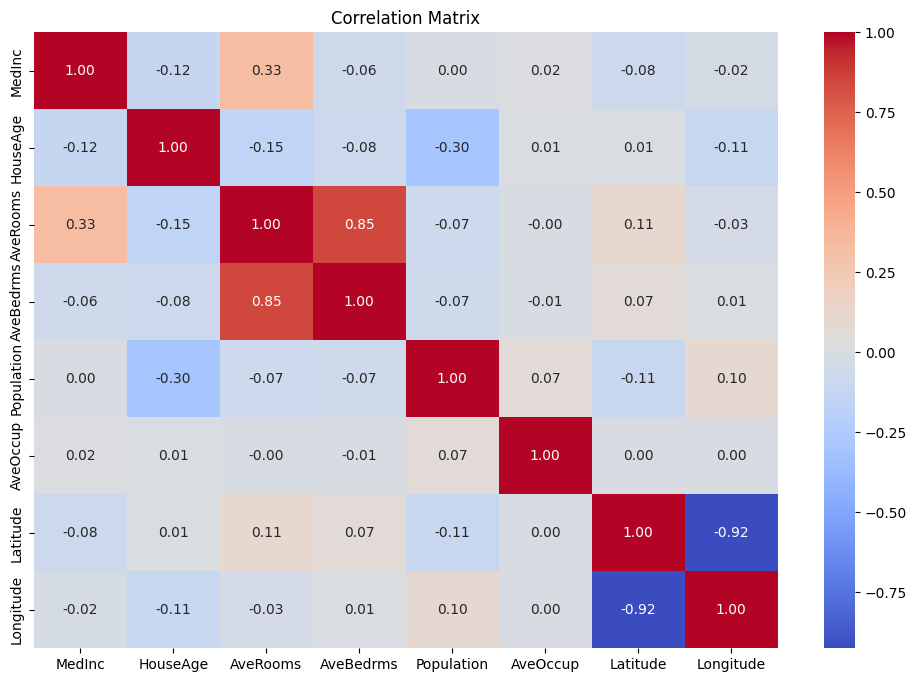

In [8]:
 # Task 4 : Model Interpretation
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [9]:
# Correlation of each feature with target
X_with_target = X.copy()
X_with_target['Target'] = y
print("Correlation of features with target:\n")
print(X_with_target.corr()['Target'].sort_values(ascending=False))

Correlation of features with target:

Target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Target, dtype: float64


In [10]:
# Detecting multicollinearity via high correlation pairs
corr_matrix = X.corr().abs()
high_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
             .stack()
             .sort_values(ascending=False))

print("\nHighly correlated feature pairs (possible multicollinearity):")
print(high_corr[high_corr > 0.75])


Highly correlated feature pairs (possible multicollinearity):
Latitude  Longitude    0.924664
AveRooms  AveBedrms    0.847621
dtype: float64
